# Machine Learning assn1

Author: Xiaolan Li

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

### data1 

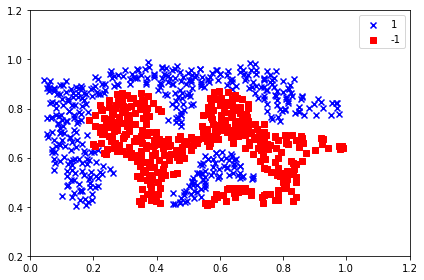

In [2]:
# read data1 into dataframe and rename the column
data1 = pd.read_csv("data1.txt", header=None, delim_whitespace=True, names=['label','x','y'])

# scatter data in different labels
plt.scatter(data1[data1.label == 1]['x'],
            data1[data1.label == 1]['y'],
            c='b', marker='x',
            label='1')
plt.scatter(data1[data1.label == -1]['x'],
            data1[data1.label == -1]['y'],
            c='r',
            marker='s',
            label='-1')

plt.xlim([0, 1.2])
plt.ylim([0.2, 1.2])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

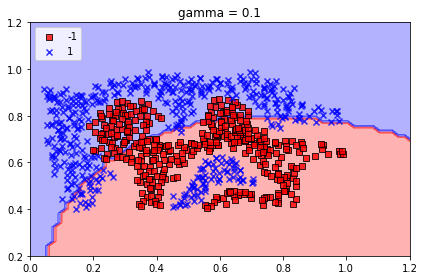

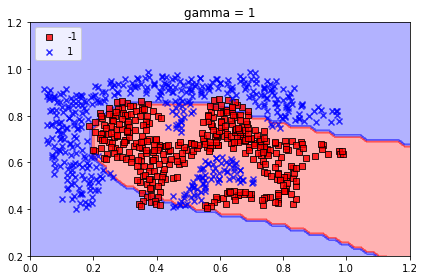

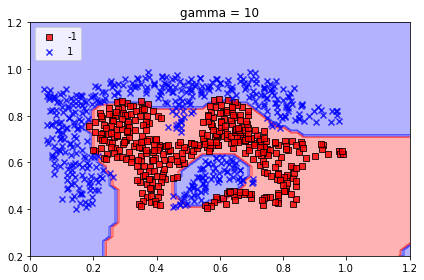

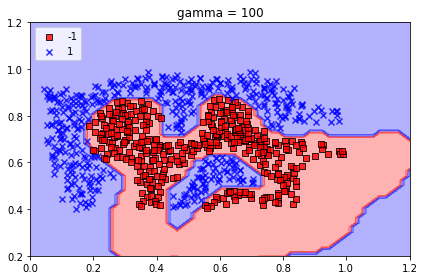

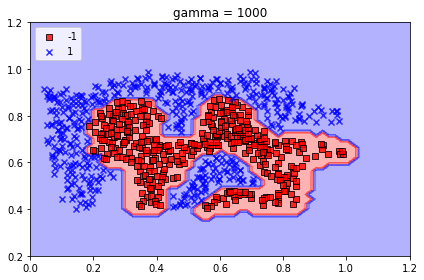

In [3]:
# create decision regions plot function for trainning and testing data
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

# plot and train data in different gamma
for gamma in [0.1,1,10,100,1000]:
    svm = SVC(kernel='rbf', random_state=1, gamma=gamma, C=10)
    svm.fit(np.array(data1[['x','y']]), np.array(data1['label']))
    plot_decision_regions(np.array(data1[['x','y']]), np.array(data1['label']),
                          classifier=svm)
    plt.title(f'gamma = {gamma}')
    plt.xlim([0, 1.2])
    plt.ylim([0.2, 1.2])
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

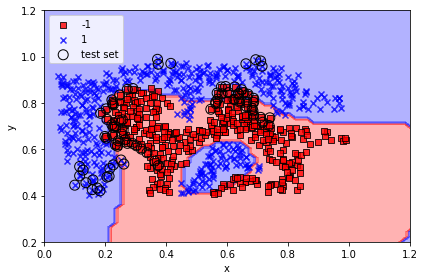

gamma = 0.1,  accuracy = 0.2716049382716049
gamma = 1,  accuracy = 0.6666666666666666
gamma = 10,  accuracy = 0.7530864197530864
gamma = 100,  accuracy = 0.7777777777777778
gamma = 1000,  accuracy = 0.7777777777777778


In [4]:
# Splitting data into 90% training and 10% test data:
X_train = np.array(data1[:-round(len(data1)*0.1)][['x','y']])
y_train = np.array(data1[:-round(len(data1)*0.1)]['label'])
svm = SVC(kernel='rbf', random_state=1, gamma=10, C=10)
svm.fit(X_train, y_train)

# draw testing and training data in the gragh
plot_decision_regions(np.array(data1[['x','y']]), np.array(data1['label']),
                      classifier=svm, test_idx=range(data1[-round(len(data1)*0.1):].index[0], len(data1)))

plt.xlim([0, 1.2])
plt.ylim([0.2, 1.2])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# predict test data and get the accuracy
for gamma in [0.1,1,10,100,1000]:
    svm = SVC(kernel='rbf', random_state=1, gamma=gamma, C=10)
    svm.fit(X_train, y_train)
    predicted  = svm.predict(data1[-round(len(data1)*0.1):][['x','y']])
    # get the accuracy
    y_test = data1[-round(len(data1)*0.1):]['label']
    print(f'gamma = {gamma},  accuracy = {accuracy_score(y_test, predicted)}')

From the test accuracy result in data1, we can see when gamma = 100 and 1000, it has the highest accuracy at around 0.78.

### data2

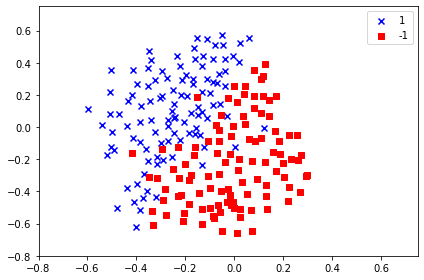

In [5]:
# read data2 into dataframe and rename the column
data2 = pd.read_csv("data2.txt", header=None, delim_whitespace=True, names=['label','x','y'])

# scatter data in different labels
plt.scatter(data2[data2.label == 1]['x'],
            data2[data2.label == 1]['y'],
            c='b', marker='x',
            label='1')
plt.scatter(data2[data2.label == -1]['x'],
            data2[data2.label == -1]['y'],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-0.8, 0.75])
plt.ylim([-0.8, 0.75])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

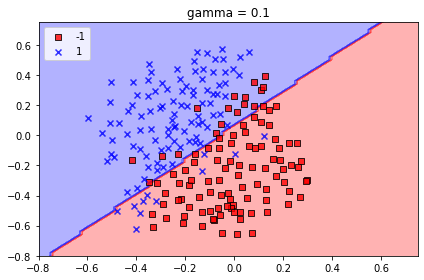

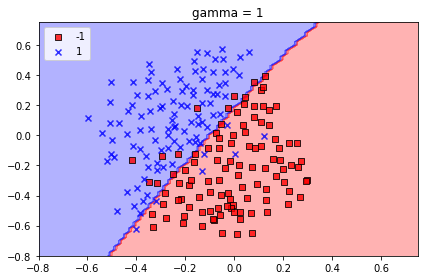

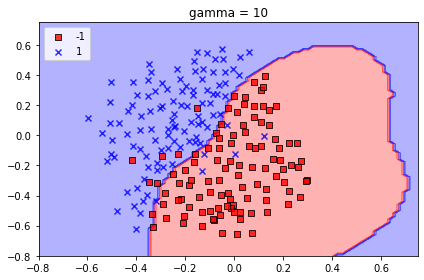

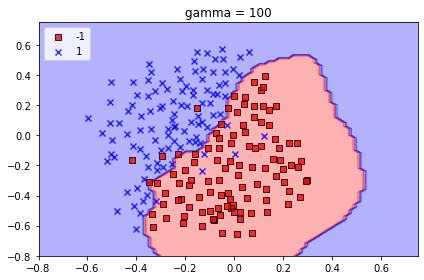

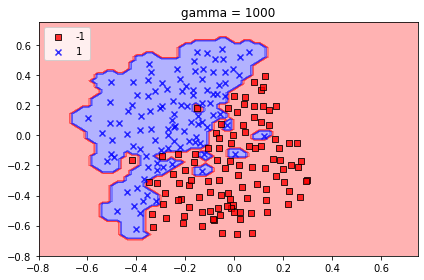

In [6]:
# plot and train data in different gamma
for gamma in [0.1,1,10,100,1000]:
    svm = SVC(kernel='rbf', random_state=1, gamma=gamma, C=1)
    svm.fit(np.array(data2[['x','y']]), np.array(data2['label']))
    plot_decision_regions(np.array(data2[['x','y']]), np.array(data2['label']),
                          classifier=svm)
    plt.title(f'gamma = {gamma}')
    plt.xlim([-0.8, 0.75])
    plt.ylim([-0.8, 0.75])
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

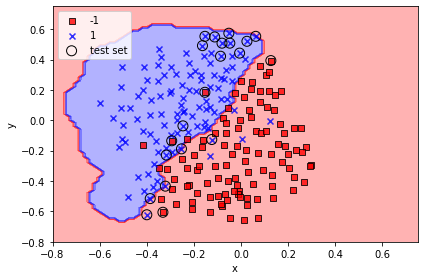

gamma = 0.1,  accuracy = 0.6666666666666666
gamma = 1,  accuracy = 0.7142857142857143
gamma = 10,  accuracy = 0.8095238095238095
gamma = 100,  accuracy = 0.6666666666666666
gamma = 1000,  accuracy = 0.3333333333333333


In [7]:
# Splitting data into 90% training and 10% test data:
X_train = np.array(data2[:-round(len(data2)*0.1)][['x','y']])
y_train = np.array(data2[:-round(len(data2)*0.1)]['label'])
svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1)
svm.fit(X_train, y_train)

# draw testing and training data in the gragh
plot_decision_regions(np.array(data2[['x','y']]), np.array(data2['label']),
                      classifier=svm, test_idx=range(data2[-round(len(data2)*0.1):].index[0], len(data2)))

plt.xlim([-0.8, 0.75])
plt.ylim([-0.8, 0.75])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# predict test data and get the accuracy
for gamma in [0.1,1,10,100,1000]:
    svm = SVC(kernel='rbf', random_state=1, gamma=gamma, C=1)
    svm.fit(X_train, y_train)
    predicted  = svm.predict(data2[-round(len(data2)*0.1):][['x','y']])
    # get the accuracy
    y_test = data2[-round(len(data2)*0.1):]['label']
    print(f'gamma = {gamma},  accuracy = {accuracy_score(y_test, predicted)}')

From the test accuracy result in data2, we can see when gamma = 10, it has the highest accuracy at around 0.81.